In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
import keras
data=pd.read_csv("mnist_train.csv")
print(data.head())

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [31]:
from keras.models import Sequential
from keras.layers import Dense,MaxPooling2D,Conv2D,Dropout,Flatten



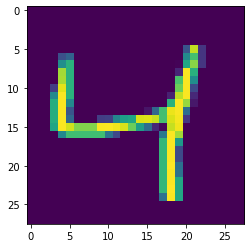

In [32]:
#Just check how the data look like here checking data in 3rd row and first column
check=data.iloc[2,1:].values.reshape(28,28).astype('uint8')
plt.imshow(check)

# CNN using mnist

In [33]:
from keras.datasets import mnist
#split data for training and testing
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [34]:
#2D Convolution operation requires the input shape of image to be a 4D. But mnist is 3D shape array.
x_train=x_train.reshape(-1,28,28,1).astype('float32')
print(x_train.shape)
x_test=x_test.reshape(-1,28,28,1).astype('float32')
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [35]:
#normalize our image data by normalizing the pixel 
#values of grayscale image that is by rescaling it to [0,1] range.
x_train=x_train/255.0
x_test=x_test/255.0


In [36]:
# We are using one hot encoding to convert this integer value(0-9) into a 10 channel one hot vector

from keras.utils import np_utils

y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)



# CNN Architecture 

In [44]:
from keras.optimizers import Adam

model=Sequential()



In [45]:
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(x_train.shape[1:]),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10,activation='softmax'))

In [46]:
# compiling the model
#categorical cross entropy loss function which is best for multi-class classification problem

model.compile(loss='categorical_crossentropy',  optimizer=Adam(), metrics=['accuracy'])

In [51]:
#Train the model
from keras.callbacks import ModelCheckpoint
filepath='mnist_saved.hdf5'
Model_checkpoint=ModelCheckpoint(filepath,monitor='loss',verbose=1,save_best_only=True,mode='min')
model.fit(x_train, y_train, epochs=10, callbacks=[Model_checkpoint],validation_data=(x_test, y_test), batch_size=32)
# save the model
file='mnist_saved.hdf5'
model.load_weights(file)
#recompile
model.compile(loss='categorical_crossentropy',  optimizer=Adam(), metrics=['accuracy'])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 54s 906us/step - loss: 0.0697 - accuracy: 0.9786 - val_loss: 0.0451 - val_accuracy: 0.9856

Epoch 00001: loss improved from inf to 0.06969, saving model to mnist_saved.hdf5
Epoch 2/10
60000/60000 [==============================] - 52s 871us/step - loss: 0.0428 - accuracy: 0.9862 - val_loss: 0.0310 - val_accuracy: 0.9895

Epoch 00002: loss improved from 0.06969 to 0.04284, saving model to mnist_saved.hdf5
Epoch 3/10
60000/60000 [==============================] - 54s 899us/step - loss: 0.0310 - accuracy: 0.9904 - val_loss: 0.0344 - val_accuracy: 0.9891

Epoch 00003: loss improved from 0.04284 to 0.03104, saving model to mnist_saved.hdf5
Epoch 4/10
60000/60000 [==============================] - 55s 914us/step - loss: 0.0244 - accuracy: 0.9922 - val_loss: 0.0286 - val_accuracy: 0.9910

Epoch 00004: loss improved from 0.03104 to 0.02439, saving model to mnist_saved.hdf5
Epoch 5/10
600

In [53]:
# evaluate the model on test data
score = model.evaluate(x_test, y_test, verbose = 0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

# predicting on the test data
y_pred=model.predict(x_test)

#r2_score value
from sklearn.metrics import r2_score
print(r2_score(y_pred,y_test))

Test loss: 0.026800465494919445
Test accuracy: 0.9927999973297119
0.9873481002596348
